# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('./data/college_completion.csv', low_memory= False)
print(df.shape)
#there are 3798 observations in this table
print(df.columns)
print(df.head())
#the variables are listed below. there is a lot of "vsa" columns...

print(pd.crosstab(df['control'],df['level']),'\n') 
#there is a large number of private non profit universities (1180) followed by public 2 year universities (926). These are the
#largest two groups with private non profit 2 year universities being the smallest


(3798, 63)
Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


<Axes: xlabel='grad_100_value', ylabel='Count'>

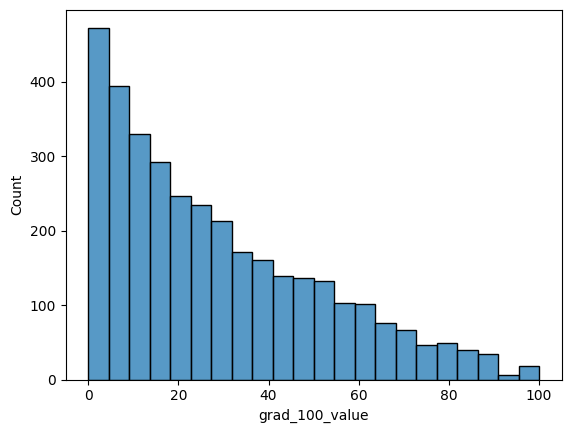

In [3]:

print(df['grad_100_value'].describe())
sns.histplot(df['grad_100_value'])

<Axes: xlabel='grad_100_value', ylabel='Density'>

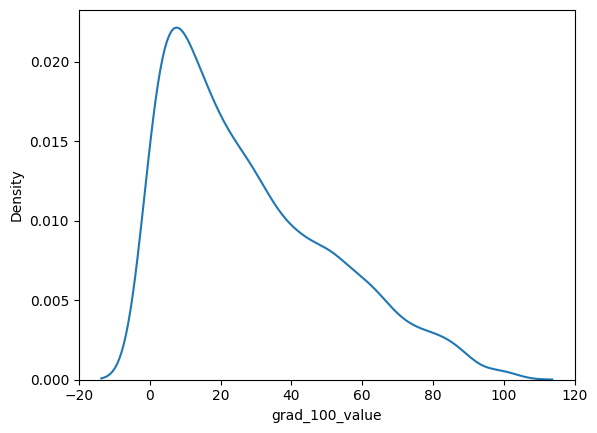

In [4]:
sns.kdeplot(df['grad_100_value'])

<Axes: ylabel='grad_100_value'>

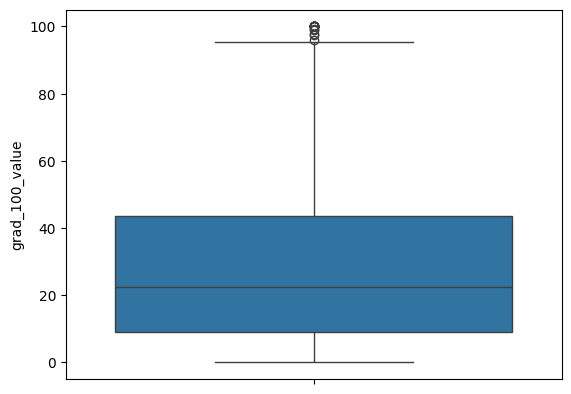

In [5]:

sns.boxplot(df['grad_100_value'])

<Axes: xlabel='grad_100_value', ylabel='Density'>

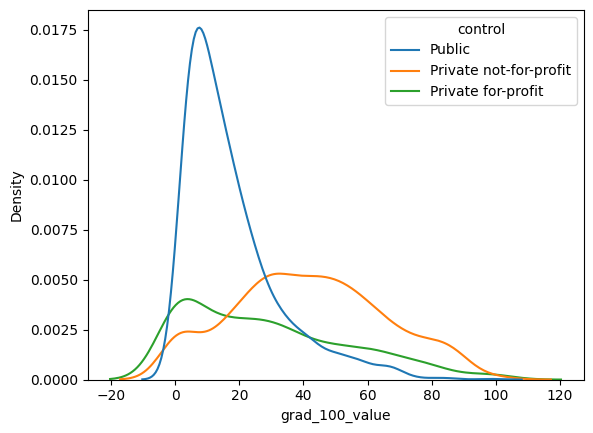

In [6]:
sns.kdeplot(data = df, x = 'grad_100_value', hue = 'control')

<Axes: xlabel='grad_100_value', ylabel='Density'>

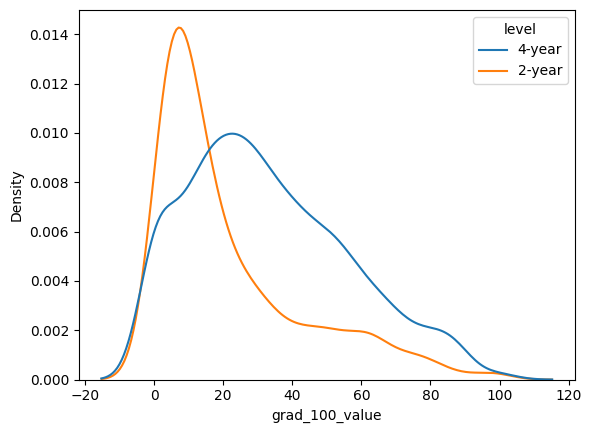

In [7]:
sns.kdeplot(data = df, x = 'grad_100_value', hue = 'level')
#based on these two graphs, the graduation percentage is a lot lower than i expected for both the control and also level of colleges.
#private non profit universities seem to have better graduation rates at 41.66%
#and 4 year universities are at 33% compared to the 2 year unis at 21%

In [8]:
print(df.loc[:, ['control','grad_100_value']].groupby('control').describe())
print(df.loc[:, ['level','grad_100_value']].groupby('level').describe())

                       grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8  
       grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   

                               grad_100_value                             \
                                        count       mean        std  min   
levelXcontrol                                                              
2-year, Private for-profit              461.0  37.197614  25.497380  0.0   
2-year, Private not-for-profit           68.0  41.913235  28.348302  0.0   
2-year, Public                          926.0  12.400000  10.893600  0.0   
4-year, Private for-profit              318.0  17.382704  20.788525  0.0   
4-year, Private not-for-profit         1121.0  41.645674  23.243453  0.0   
4-year, Public                          573.0  25.561082  16.403902  0.0   

                                                             
                                   25%   50%     75%    max  
levelXcontrol                                                
2-year, Private for-profit      15.800  33.9  57.800  100.0  
2-year, Private not-for-profit  16.225  44.4  61.200  100.0  
2-yea

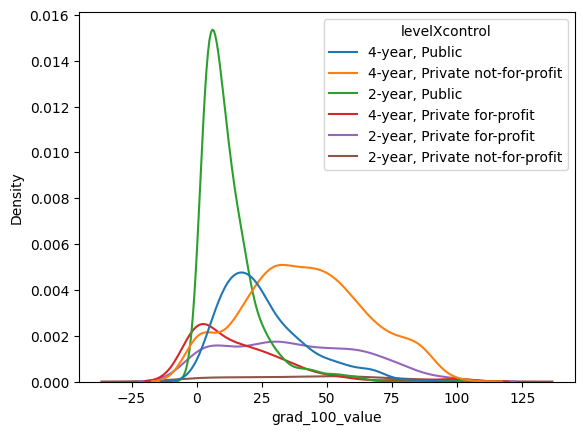

In [9]:
df['levelXcontrol']=df['level']+', '+df['control']
sns.kdeplot(data = df, x = 'grad_100_value', hue = 'levelXcontrol')
print(df.loc[:, ['levelXcontrol','grad_100_value']].groupby('levelXcontrol').describe())
#the best graduation rates are at 2 year private non profit universities and 4 year private non profit. Meanwhile, the public 2 year
#universities have the worst graduation rate at 12%. There seem to be three groups from best to worst: 2y public and 4y private for profit
# next is 4y public and 2y private for profit, and lastly the best two mentioned before.
#I'm kind of curious about this. Private for profit universities are probably quite difficult which is why there's a low rate and maybe
#2y public unis are very cheap so people feel fine dropping out? Not sure. I'd like to know some more about these things

<Axes: xlabel='aid_value', ylabel='Density'>

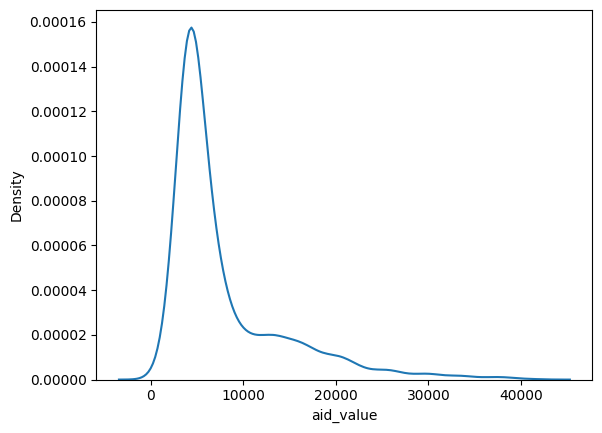

In [10]:
sns.kdeplot(data = df, x = 'aid_value')

<Axes: xlabel='aid_value', ylabel='Density'>

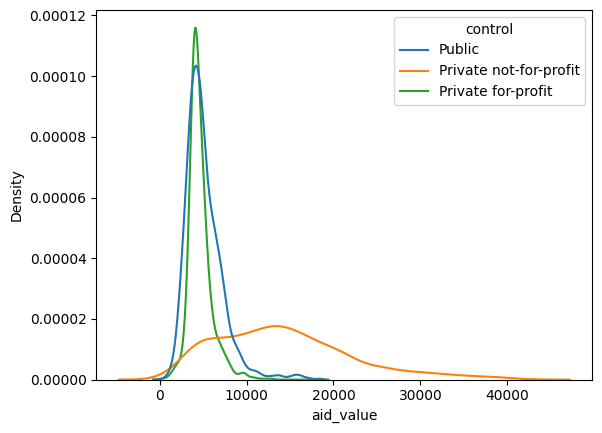

In [11]:
sns.kdeplot(data = df, x = 'aid_value', hue = 'control')

<Axes: xlabel='aid_value', ylabel='Density'>

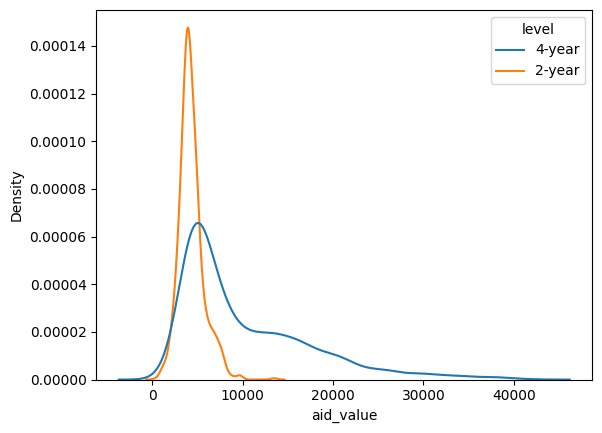

In [12]:
sns.kdeplot(data = df, x = 'aid_value', hue = 'level')

In [13]:
print(df.loc[:, ['control','aid_value']].groupby('control').describe())
print(df.loc[:, ['level','aid_value']].groupby('level').describe())
#private non profit universities seem to give the most aid to their students. on the other hand, it seems like 4 year universities are more
#likely to give their students more aid as well. public and for profit unis give their students around the same amount of aid on avg

                       aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0  
       aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                  

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

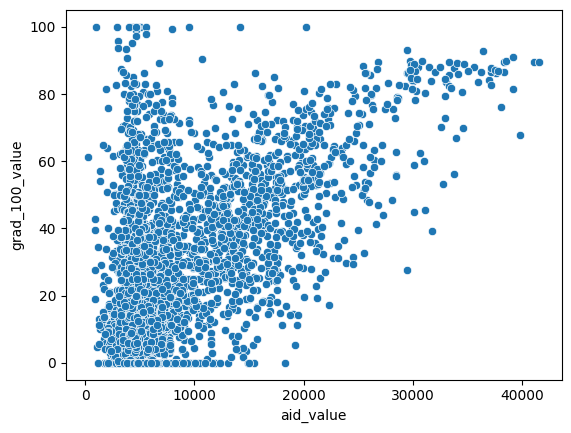

In [14]:
sns.scatterplot(data = df, x = 'aid_value', y = 'grad_100_value')

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

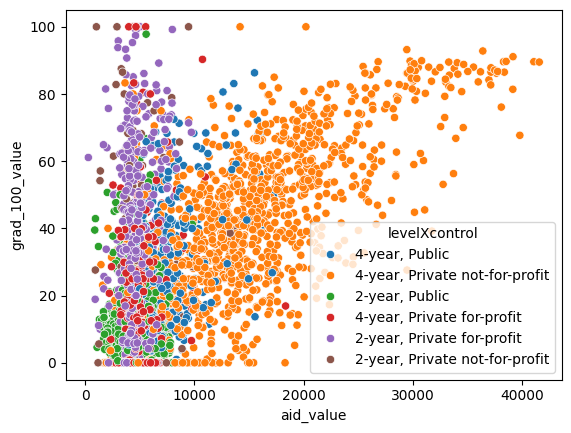

In [15]:
sns.scatterplot(data = df, x = 'aid_value', y = 'grad_100_value', hue = 'levelXcontrol')
#it's interesting. it seems like in general, a higher amount of aid could correspond to a higher graduation rate. This may not necessarily
#be the case, but the higher amounts of aid have a higher grad_100_value. Also, it seems like a lot of the universities are sitting around
#the 0-10k range with a very wide spread of graduation rates.

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them? 
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

count    12783.000000
mean         3.951498
std          1.517847
min          1.000000
25%          3.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: DEM_IPR_IND, dtype: float64
[5 1 4 2 3]


<Axes: xlabel='DEM_IPR_IND', ylabel='Density'>

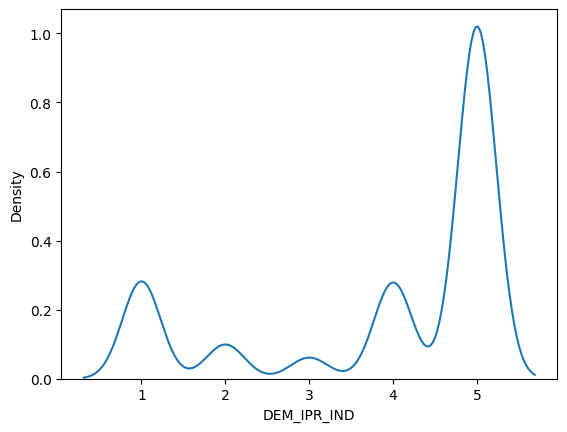

In [29]:
#I chose the recommended data source. There may be some missing values in categorical variables which are signified by "Missing"
#as written in the FAQ. The DUG also indicates there may be a number of missing values but does not specify how they are handled
#also, values set as inapplicable have been changed to missing

df = pd.read_csv('./data/sfpuf2021_1_fall.csv', low_memory= False)
poverty = df['DEM_IPR_IND']
# 1="1: <=100% of the Federal Poverty Level"     
# 2="2: >100% and <=120% of the Federal Poverty" 
# 3="3: >120% and <=135% of the Federal Poverty"
# 4="4: >135% and <=200% of the Federal Poverty" 
# 5="5: >200% of the Federal Poverty Level"
# .="Inapplicable/Missing";
df['DEM_IPR_IND'] = pd.to_numeric(poverty, errors='coerce')
print(poverty.describe())
print(poverty.unique())
#luckily, there are no missing values in this column
#median is 5, but the average is around 3-4 which means most people using medicare are above the federal poverty level
#there are big spikes around 1 and then 4 and 5.
sns.kdeplot(data = df, x = 'DEM_IPR_IND')

#i chose just to make the kernel density plots because i felt it was the most clear

[1 2]


<Axes: xlabel='DEM_IPR_IND', ylabel='Density'>

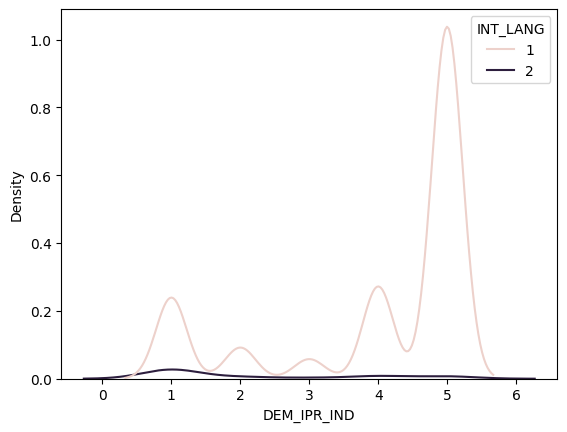

In [28]:
print(df['INT_LANG'].unique())
sns.kdeplot(data = df, x = 'DEM_IPR_IND', hue = 'INT_LANG')
# this graph splits it into lang 1 and 2 where 1 is english and 2 is spanish.
#interestingly though, english is the majority so it follows the previous trend
#where on the other hand spanish is similar in that 1, 4, and 5 are hot spots
#but the <poverty line is the majority rather than > the poverty line.

<Axes: xlabel='INT_LANG', ylabel='DEM_IPR_IND'>

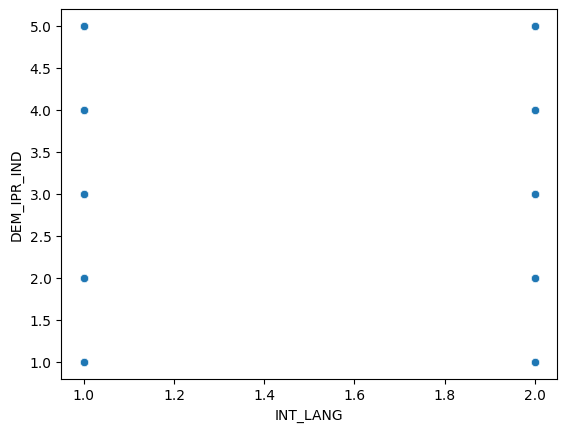

In [27]:
sns.scatterplot(data = df, x = 'INT_LANG', y = 'DEM_IPR_IND')
#i think the scatterplot didn't come out well because they are both categorical variables